In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

2.4.1


In [2]:
import numpy as np
import os
import h5py
from keras_preprocessing.image import ImageDataGenerator



## preprocessing dataset


In [3]:
trainDataGen = ImageDataGenerator(
		rotation_range = 5,
		width_shift_range = 0.1,
		height_shift_range = 0.1,
		rescale = 1.0/255,
		shear_range = 0.2,
		zoom_range = 0.2,		
		horizontal_flip = False,
		fill_mode = 'nearest')
trainGenerator = trainDataGen.flow_from_directory(
			"DevanagariHandwrittenCharacterDataset/Train",
			target_size = (32,32),
			batch_size = 32,
			color_mode = "grayscale",
			class_mode = "categorical")

Found 78200 images belonging to 46 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
validation_generator = test_datagen.flow_from_directory(
			"DevanagariHandwrittenCharacterDataset/Test",
			target_size=(32,32),
			batch_size=32,
			color_mode = "grayscale",
			class_mode= 'categorical')

Found 13800 images belonging to 46 classes.


In [6]:
labels = ["ka","kha","ga","gha","kna","cha","chha","ja","jha","yna","t`a","t`ha","d`a","d`ha","adna","ta","tha","da","dha","na","pa","pha","ba","bha","ma","yaw","ra","la","waw","sha","shat","sa","ha","aksha","tra","gya","0","1","2","3","4","5","6","7","8","9"]


In [7]:
model=tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.layers.Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
			input_shape = (32,32,1)))

model.add(tf.keras.layers.BatchNormalization())
#model.add(Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

In [9]:
model.add(tf.keras.layers.Convolution2D(filters = 32,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu",
            input_shape = (32,32,1)))

model.add(tf.keras.layers.BatchNormalization())
#model.add(Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

In [10]:
model.add(tf.keras.layers.Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))

model.add(tf.keras.layers.BatchNormalization())
#model.add(Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

In [11]:
model.add(tf.keras.layers.Convolution2D(filters = 64,
			kernel_size = (3,3),
			strides = 1,
			activation = "relu"))

model.add(tf.keras.layers.BatchNormalization())
#model.add(Dropout(0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
			strides=(2, 2),
			padding="same"))

In [12]:
model.add(tf.keras.layers.Flatten())


In [13]:
model.add(tf.keras.layers.Dense(128,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(64,
		activation = "relu",
		kernel_initializer = "uniform"))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(46,
		activation = "softmax",
		kernel_initializer = "uniform"))


In [14]:
model.compile(optimizer = "adam",
		loss = "categorical_crossentropy",
		metrics = ["accuracy"])
print(model.summary())	

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          1

In [15]:
es = EarlyStopping(monitor='val_acc', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
res=model.fit(
		x=trainGenerator,
		epochs = 25,
		steps_per_epoch = 2444,
		validation_data = validation_generator,
		validation_steps = 432,
		verbose=1,
		callbacks=[reduce_lr,es]
		)

Epoch 1/25
2444/2444 [==============================] - 99s 38ms/step - loss: 1.4800 - accuracy: 0.6195 - val_loss: 0.3734 - val_accuracy: 0.8852
Epoch 2/25
2444/2444 [==============================] - 76s 31ms/step - loss: 0.3307 - accuracy: 0.8981 - val_loss: 0.1395 - val_accuracy: 0.9553
Epoch 3/25
2444/2444 [==============================] - 75s 31ms/step - loss: 0.2478 - accuracy: 0.9229 - val_loss: 0.1046 - val_accuracy: 0.9667
Epoch 4/25
2444/2444 [==============================] - 69s 28ms/step - loss: 0.2047 - accuracy: 0.9361 - val_loss: 0.1267 - val_accuracy: 0.9631
Epoch 5/25
2444/2444 [==============================] - 54s 22ms/step - loss: 0.1867 - accuracy: 0.9419 - val_loss: 0.0828 - val_accuracy: 0.9752
Epoch 6/25
2444/2444 [==============================] - 54s 22ms/step - loss: 0.1625 - accuracy: 0.9494 - val_loss: 0.0828 - val_accuracy: 0.9754
Epoch 7/25
2444/2444 [==============================] - 55s 23ms/step - loss: 0.1485 - accuracy: 0.9537 - val_loss: 0.0818 -

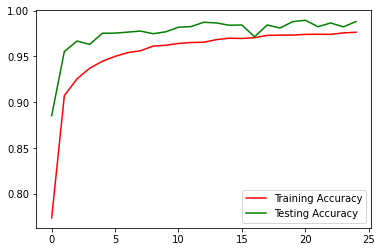

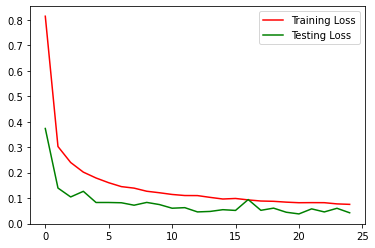

In [17]:
accu=res.history['accuracy']
val_acc=res.history['val_accuracy']
loss=res.history['loss']
val_loss=res.history['val_loss']

epochs=range(len(accu)) #No. of epochs

import matplotlib.pyplot as plt
plt.plot(epochs,accu,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

In [18]:
model.save("HindiModel3.h5")